# 导入tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# 载入mnist数据集   
所有数据集：boston_housing、cifar10、cifar100、fashion_mnist、imdb、mnist、reuters

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# 数据预处理   
数据从0-255归一化到0-1

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# 搭建keras模型   
传入layers集合   
Flatten，展开层，多维转一维   
Dense，全连接层，传入输出长度、激活函数（relu、softmax、tanh、sigmoid......）   
Dropout，舍弃层，传入舍弃比例    

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 编译keras模型   
选择优化器和损失函数   
optimizer，优化器用adam   
loss，损失函数用sparse_categorical_crossentropy   
metrics，指标是accuracy（准确率）

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型   
输入训练图像和训练标签，以及执行轮数（epochs）是5轮

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4845 - accuracy: 0.8601
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1418 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1052 - accuracy: 0.9692
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0865 - accuracy: 0.9741
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0675 - accuracy: 0.9785


# 评估模型   
输入测试图像和测试标签，以及细节模式（verbose）（0是安静模式、1是进度条模式）   

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0771 - accuracy: 0.9773


[0.0771036148071289, 0.9772999882698059]

# 模型的其他函数

In [ ]:
#显示模型结构
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#预测
import numpy as np
predictions = model.predict(x_test)
print(predictions[0]) #预测10个输出个可能性，7的可能性为1
print(np.argmax(predictions[0])) #求出最大的可能性，是7
print(y_test[0]) #和测试标签7吻合

[6.2475576e-09 9.8556652e-10 1.2790301e-06 2.0720022e-04 5.4214662e-12
 9.8079120e-08 2.0910445e-14 9.9979013e-01 3.5381748e-07 9.1991899e-07]
7
7


# 其他辅助功能

In [ ]:
#显示数据维度
x_train.shape

(60000, 28, 28)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#显示数据长度
len(x_train)

60000

In [ ]:
#显示数据类型
type(x_train)

numpy.ndarray

In [ ]:
#显示数据
y_train[0]

5

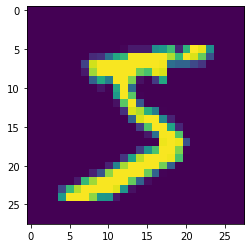

In [ ]:
#显示图像
import matplotlib.pyplot as plt #导入matplotlib
plt.imshow(x_train[0])

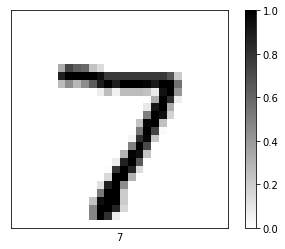

In [ ]:
plt.figure() #设置
plt.xticks([]) #不显示x轴刻标
plt.yticks([]) #不显示y轴刻标
plt.imshow(x_test[0], cmap=plt.cm.binary) #显示灰度图像
plt.colorbar() #显示颜色条
plt.grid(False) #不显示网格
plt.xlabel(y_test[0]) #设置x轴标签文本
plt.show()

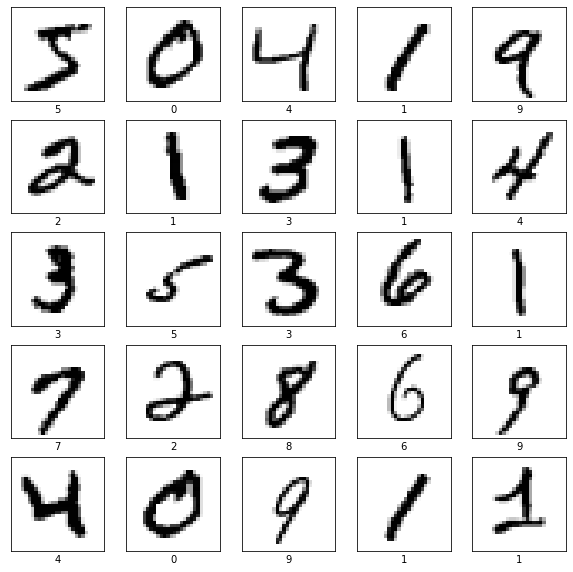

In [ ]:
plt.figure(figsize=(10,10)) #设置为10x10大小
for i in range(25):
    plt.subplot(5,5,i+1) #分割成5x5并选择第i个子图
    plt.xticks([]) #不显示x轴刻标
    plt.yticks([]) #不显示y轴刻标
    plt.grid(False) #不显示网格
    plt.imshow(x_train[i], cmap=plt.cm.binary) #显示灰度图像
    plt.xlabel(y_train[i]) #设置x轴标签文本
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26e5d5b4-a604-4f7b-aef4-7756f8127ef0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>